# Case Study: Hacker Statistics 🐱‍💻
En esta parte del curso veremos un compilado de todo lo aprendido en las 4 lecciones previas, en forma de un caso de estudio.

## Random Numbers
Tiras un dado cien veces, si es uno o dos, bajarás un escalón. Si es 3,4 o 5. Si obtienes 6, lanzarás el dado de nuevo y subirás el número de pasos resultante. <br>
Consideraciones:
- No puedes dar pasos debajo del escalón 0,
- Tienes 0.1% de probabilidad de caerte de las escaleras (empezar de 0)
- Problema: Apuestas con un amigo que llegarás al escalón 60. ¿Cuál es la probabilidad de que ganes esta apuesta?

Hay dos formas de resolverlo:
- Analíticamente (Con Ecuaciones)
- Simular el proceso miles de veces y ver que fracción de las simulaciones alcanzará los 60 pasos. (Hacker Statistics)

Con fines de practicar lo que hemos aprendido, utilizaremos la simulacion del proceso.

### Random Generators
Como primer paso, necesitamos generadores aleatorios de números para poder simular un dado.
Utilizaremos el package random dentro de numpy para generar estos números.

In [30]:
import numpy as np
np.random.rand() #Función para randomizar números de uno a 0 en numpy, obtenemos número random entre 0 y 1

0.28613933495037946

Todas las computadoras están generando números 'random', podemos utilizar la función .seed() para agarrar un número random en especifico entre 0 y 1.

In [87]:
np.random.seed()
print('Sin seed cambia:',np.random.rand()) # Al no meter el seed el número random cambia cada que lo corres.
np.random.seed(1)
print('Con seed se queda fijo:',np.random.rand()) # Al meter el seed el número random se queda fijo

Sin seed cambia: 0.2676249861933705
Con seed se queda fijo: 0.417022004702574


In [122]:
np.random.seed(123) #El resultado siempre será el mismo porque el seed siempre es el mismo
coin = np.random.randint(0,2) #Genera de forma aleatoria 1 y 0
print(coin)
if coin == 0:
    print("heads")
else:
    print("tails")

0
heads


### Primer paso del Caso de Estudio
Asumiendo que empezamos del escalón 50, tiramos un dado y aplicamos las condiciones de finidas al inicio

In [123]:
# Starting step
step = 50

# Tiramos el dado
dice = np.random.randint(1,7)

# Creamos el flujo de control
if dice <= 2 :
    step = step - 1
elif dice in [3,4,5]:
    step = step +1
else :
    step = step + np.random.randint(1,7)

# Imprimimos el resultado del dado y el escalón en el que estamos
print(dice)
print(step)

6
53


## Random Walk
Si uso un dado para determinar el próximo paso, lo podemos llamar paso aleatorio. Una sucesión de pasos aleatorios (random steps), lo podemos considerar un random walk. <br>
Ejemplos reales donde se utiliza son:
- Modelar trayectoria trazada por una molécula a medida que viaja en un líquido o gas
- El estado financiero de un apostador


La forma de hacer un random walk es utilizar el código del random step y meterlo en un loop, guardando la variable al final del loop en una lista y llamando el ultimo elemento de la lista al inicio del loop.

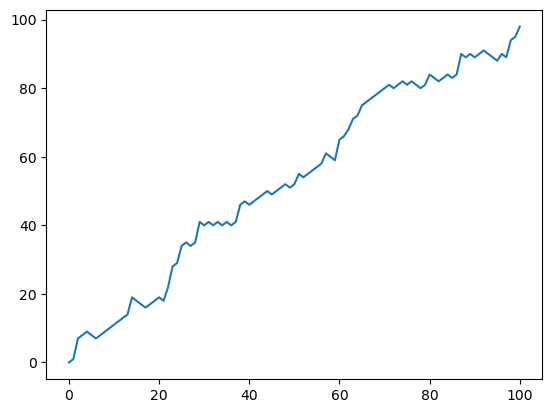

[0, 1, 7, 8, 9, 8, 7, 8, 9, 10, 11, 12, 13, 14, 19, 18, 17, 16, 17, 18, 19, 18, 22, 28, 29, 34, 35, 34, 35, 41, 40, 41, 40, 41, 40, 41, 40, 41, 46, 47, 46, 47, 48, 49, 50, 49, 50, 51, 52, 51, 52, 55, 54, 55, 56, 57, 58, 61, 60, 59, 65, 66, 68, 71, 72, 75, 76, 77, 78, 79, 80, 81, 80, 81, 82, 81, 82, 81, 80, 81, 84, 83, 82, 83, 84, 83, 84, 90, 89, 90, 89, 90, 91, 90, 89, 88, 90, 89, 94, 95, 98]


In [139]:
import numpy
import matplotlib.pyplot as plt
np.random.seed(123)

# Inicializamos Random Walk
random_walk = [0]

# Tiramos 100 dados
for x in range(100) :
    step = random_walk[-1] #Definimos step como el último elemento del random walk
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Usamos max para evitar que el step sea menor a 0
        step = max(0,step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

    
# Graficamos
# Importamos matplotlib
import matplotlib.pyplot as plt

# Graficamos el random walk
plt.plot(random_walk)

# Mostrar la gráfica
plt.show()

# Imprimir el random walk
print(random_walk)

## Distribution
Al final queremos saber cual es la probabilidad de llegar al escalón 60, entonces para eso, tenemos que tomar nuestro random walk, correrlo varias veces en un loop y almacenar el ultimo step de cada random walk. Al final obtenemos la distribucion utilizando un histograma.

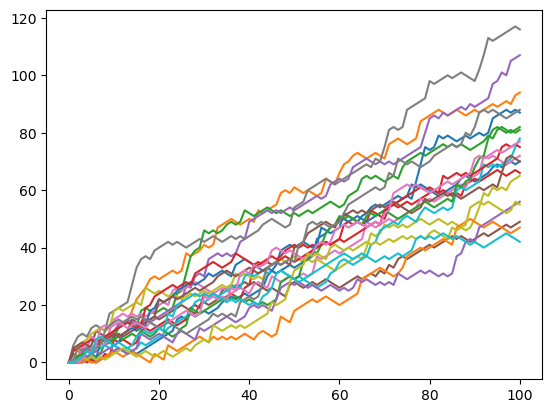

In [151]:
import numpy
import matplotlib.pyplot as plt
np.random.seed(123)

# Simula el random walk 20 veces
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Agrega la probabilidad de 0.1% de caerse (clumsiness)
        if np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Transponer numpy array y crear plot
np_aw_t = np.transpose(np.array(all_walks)) # Importante transponer el 2D numpy array para graficar, o python no entiende
plt.plot(np_aw_t)
plt.show()

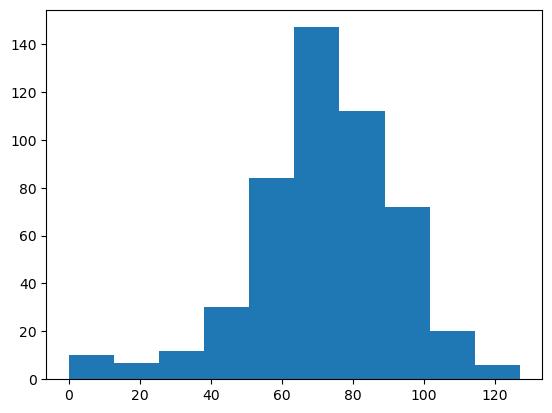

In [176]:
# El código de random walk es el mismo que el anterior.
import numpy
import matplotlib.pyplot as plt
np.random.seed(123)

# Simular random walk 500 veces
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Crear array transpuesto para graficar
np_aw_t = np.transpose(np.array(all_walks))

# Obtener ultima row de cada 1D np array dentro del 2D array, (Resultado de cada random walk)
ends = np_aw_t[-1,:]

# Plotear histograma de probabilidad
plt.hist(ends)
plt.show()

### Probabilidad de llegar al escalon 60 o más
Dividimos el número de ocurrencias dentro del array ends que son mayor o igual a 60 vs el número total de ocurrencias

In [183]:
prob_60_omas = len(ends[ends >= 60])/len(ends)
print('La probabilidad de llegar al escalon 60 o más en el random walk es de: ')
print(str(prob_60_omas*100)+'%')

La probabilidad de llegar al escalon 60 o más en el random walk es de: 
78.4%
